In [4]:
import operator
import numpy as np
import os
from csv import DictReader

datoteke = os.listdir("podatki/")
barva_datum = []
for dat in datoteke:
    if "Podatki" in dat and "2020" not in dat:
        neki = DictReader(open('podatki/' + dat, 'rt', encoding='ANSI'), delimiter=';')
        for i in neki:
            barva_datum.append((i["2A-Datum prve registracije vozila v SLO"], i["R-Barva vozila (oznaka)"], dat[8:-4]))

barva_datum = np.array(barva_datum)

In [5]:
barva_datum[0,:]
datumi_barve = dict()
for i in barva_datum:
    if i[2] not in datumi_barve:
        datumi_barve[i[2]] = []
    datumi_barve[i[2]].append(i[1])

In [9]:
from collections import Counter
stevilo_barv = []
for key in datumi_barve:
    barve = datumi_barve[key]
    najpogostejsa_barva = [[word, word_count] for word, word_count in Counter(barve).most_common(1)]
    stevilo_barv.append((najpogostejsa_barva, key, len(barve)))

In [10]:
stevilo_barv

[([['S0M', 1434]], '012015', 8479),
 ([['S0M', 1532]], '012016', 9778),
 ([['S0M', 1809]], '012017', 10883),
 ([['S0M', 2254]], '012018', 12308),
 ([['S0M', 2279]], '012019', 12414),
 ([['S0M', 1276]], '022015', 7814),
 ([['S0M', 1392]], '022016', 8700),
 ([['S0M', 1735]], '022017', 10251),
 ([['S0M', 1863]], '022018', 10105),
 ([['S0M', 2093]], '022019', 11680),
 ([['S0M', 1556]], '032015', 10810),
 ([['S0M', 1645]], '032016', 11544),
 ([['S0M', 2172]], '032017', 13577),
 ([['S0M', 2540]], '032018', 14527),
 ([['S0M', 2638]], '032019', 14656),
 ([['S0M', 1586]], '042015', 10432),
 ([['S0M', 1746]], '042016', 11159),
 ([['S0M', 2509]], '042017', 18311),
 ([['S0M', 2425]], '042018', 13760),
 ([['S0M', 2462]], '042019', 13471),
 ([['S0M', 1579]], '052015', 9891),
 ([['S0M', 1863]], '052016', 11639),
 ([['S0M', 2579]], '052017', 17763),
 ([['S0M', 2512]], '052018', 14675),
 ([['S0M', 2481]], '052019', 14389),
 ([['S0M', 1644]], '062015', 10025),
 ([['S0M', 1886]], '062016', 11850),
 ([['S

In [16]:
stevilo_barv[0][0][0][1]

1434

In [19]:
po_polletjih = dict()
for vrstica in stevilo_barv:
    if int(vrstica[1][:2]) < 7:
        if int(vrstica[1][-2:]) == 15:
            if "prvo2015" not in po_polletjih:
                po_polletjih["prvo2015"] = [0,0]
            po_polletjih["prvo2015"][0] += vrstica[0][0][1]
            po_polletjih["prvo2015"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 16:
            if "prvo2016" not in po_polletjih:
                po_polletjih["prvo2016"] = [0,0]
            po_polletjih["prvo2016"][0] += vrstica[0][0][1]
            po_polletjih["prvo2016"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 17:
            if "prvo2017" not in po_polletjih:
                po_polletjih["prvo2017"] = [0,0]
            po_polletjih["prvo2017"][0] += vrstica[0][0][1]
            po_polletjih["prvo2017"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 18:
            if "prvo2018" not in po_polletjih:
                po_polletjih["prvo2018"] = [0,0]
            po_polletjih["prvo2018"][0] += vrstica[0][0][1]
            po_polletjih["prvo2018"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 19:
            if "prvo2019" not in po_polletjih:
                po_polletjih["prvo2019"] = [0,0]
            po_polletjih["prvo2019"][0] += vrstica[0][0][1]
            po_polletjih["prvo2019"][1] += vrstica[2]
    if int(vrstica[1][:2]) > 6:
        if int(vrstica[1][-2:]) == 15:
            if "drugo2015" not in po_polletjih:
                po_polletjih["drugo2015"] = [0,0]
            po_polletjih["drugo2015"][0] += vrstica[0][0][1]
            po_polletjih["drugo2015"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 16:
            if "drugo2016" not in po_polletjih:
                po_polletjih["drugo2016"] = [0,0]
            po_polletjih["drugo2016"][0] += vrstica[0][0][1]
            po_polletjih["drugo2016"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 17:
            if "drugo2017" not in po_polletjih:
                po_polletjih["drugo2017"] = [0,0]
            po_polletjih["drugo2017"][0] += vrstica[0][0][1]
            po_polletjih["drugo2017"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 18:
            if "drugo2018" not in po_polletjih:
                po_polletjih["drugo2018"] = [0,0]
            po_polletjih["drugo2018"][0] += vrstica[0][0][1]
            po_polletjih["drugo2018"][1] += vrstica[2]
        if int(vrstica[1][-2:]) == 19:
            if "drugo2019" not in po_polletjih:
                po_polletjih["drugo2019"] = [0,0]
            po_polletjih["drugo2019"][0] += vrstica[0][0][1]
            po_polletjih["drugo2019"][1] += vrstica[2]
po_polletjih

{'prvo2015': [9075, 57451],
 'prvo2016': [10064, 64670],
 'prvo2017': [13431, 86881],
 'prvo2018': [14225, 79832],
 'prvo2019': [14325, 80318],
 'drugo2015': [8326, 51057],
 'drugo2016': [9720, 55972],
 'drugo2017': [11447, 65320],
 'drugo2018': [12708, 66557],
 'drugo2019': [12233, 65586]}

In [74]:
for i in po_polletjih:
    procent_barve = (po_polletjih[i][0]/po_polletjih[i][1]) * 100
    procet_ostalega = 100 - procent_barve
    po_polletjih[i] = [procent_barve, procet_ostalega]
po_polletjih

{'prvo2015': [23.091015495788913, 76.90898450421109],
 'prvo2016': [22.594405280409504, 77.4055947195905],
 'prvo2017': [22.37791366067412, 77.62208633932588],
 'prvo2018': [27.684792339729864, 72.31520766027013],
 'prvo2019': [27.725090965394443, 72.27490903460556],
 'drugo2015': [24.199970934457202, 75.8000290655428],
 'drugo2016': [26.606810467535315, 73.39318953246469],
 'drugo2017': [26.98109649743082, 73.01890350256917],
 'drugo2018': [30.888894290367276, 69.11110570963272],
 'drugo2019': [29.749513618677042, 70.25048638132296]}

In [75]:
koncano = [po_polletjih["prvo2015"], po_polletjih["drugo2015"], po_polletjih["prvo2016"], po_polletjih["drugo2016"], po_polletjih["prvo2017"], po_polletjih["drugo2017"], po_polletjih["prvo2018"], po_polletjih["drugo2018"], po_polletjih["prvo2019"], po_polletjih["drugo2019"]]
koncano = np.array(koncano)

In [93]:
import matplotlib.pyplot as plt
n_bins=10
colors = ['Bela', 'Ostale barve']
imena = ["prvo 2015", "drugo 2015", "prvo 2016", "drugo 2016", "prvo 2017", "drugo 2017", "prvo 2018", "drugo 2018", "prvo 2019", "drugo2019"]

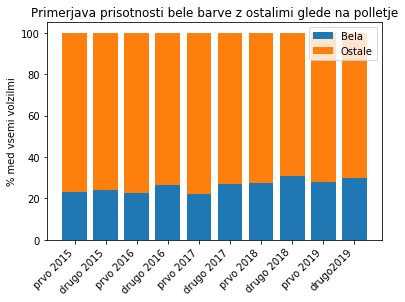

In [95]:
bela = koncano[:,0]
ostalo = koncano[:,1]
fig, ax = plt.subplots()
ax.bar(imena, bela, label='Bela')
ax.bar(imena, ostalo, bottom=bela,
       label='Ostale')

ax.set_ylabel('% med vsemi volzilmi')
ax.set_title('Primerjava prisotnosti bele barve z ostalimi glede na polletje')
ax.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()